# Assessment 2 - Q1 - Python

## NAME AND CID
Joana Levtcheva, CID 01252821




# Answers

# A

In [1]:
# A(i)

import pandas as pd

# reading steel_prices_with_exchange.csv from the current working directory and loading it into a Pandas DataFrame
# setting index_col=0 will take the first column from the csv as an index of the dataframe
# setting parse_dates=True will make the index a DatetimeIndex
raw_data = pd.read_csv("steel_prices_with_exchange.csv", index_col=0, parse_dates=True)
raw_data

,val,source
2020-09-01 00:00:00.135012414,2070.000000,Wakanda
2020-09-01 00:00:01.491934077,2400.000000,Buranda
2020-09-01 00:05:00.733157824,2430.000000,Buranda
2020-09-01 00:05:01.871980801,1950.000000,Wakanda
2020-09-01 00:10:00.937959087,2893.641781,Buranda
...,...,...
2020-09-07 23:50:01.858081713,3661.113942,Buranda
2020-09-07 23:55:00.290465808,3053.716051,Buranda
2020-09-07 23:55:01.695819795,5795.568576,Wakanda
2020-09-08 00:00:00.061642127,3157.172016,Buranda


In [2]:
# A(ii)

# boolean labeling the nan values in the 'val' column using .isna()
# summing the boolean values (true/false are treated as 1/0)
missing = raw_data['val'].isna().sum() / len(raw_data) * 100

# using :.2f in the f-string to print the value of missing rounded to the second decimal point
print(f'{missing:.2f}% of the data is missing.')

6.77% of the data is missing.


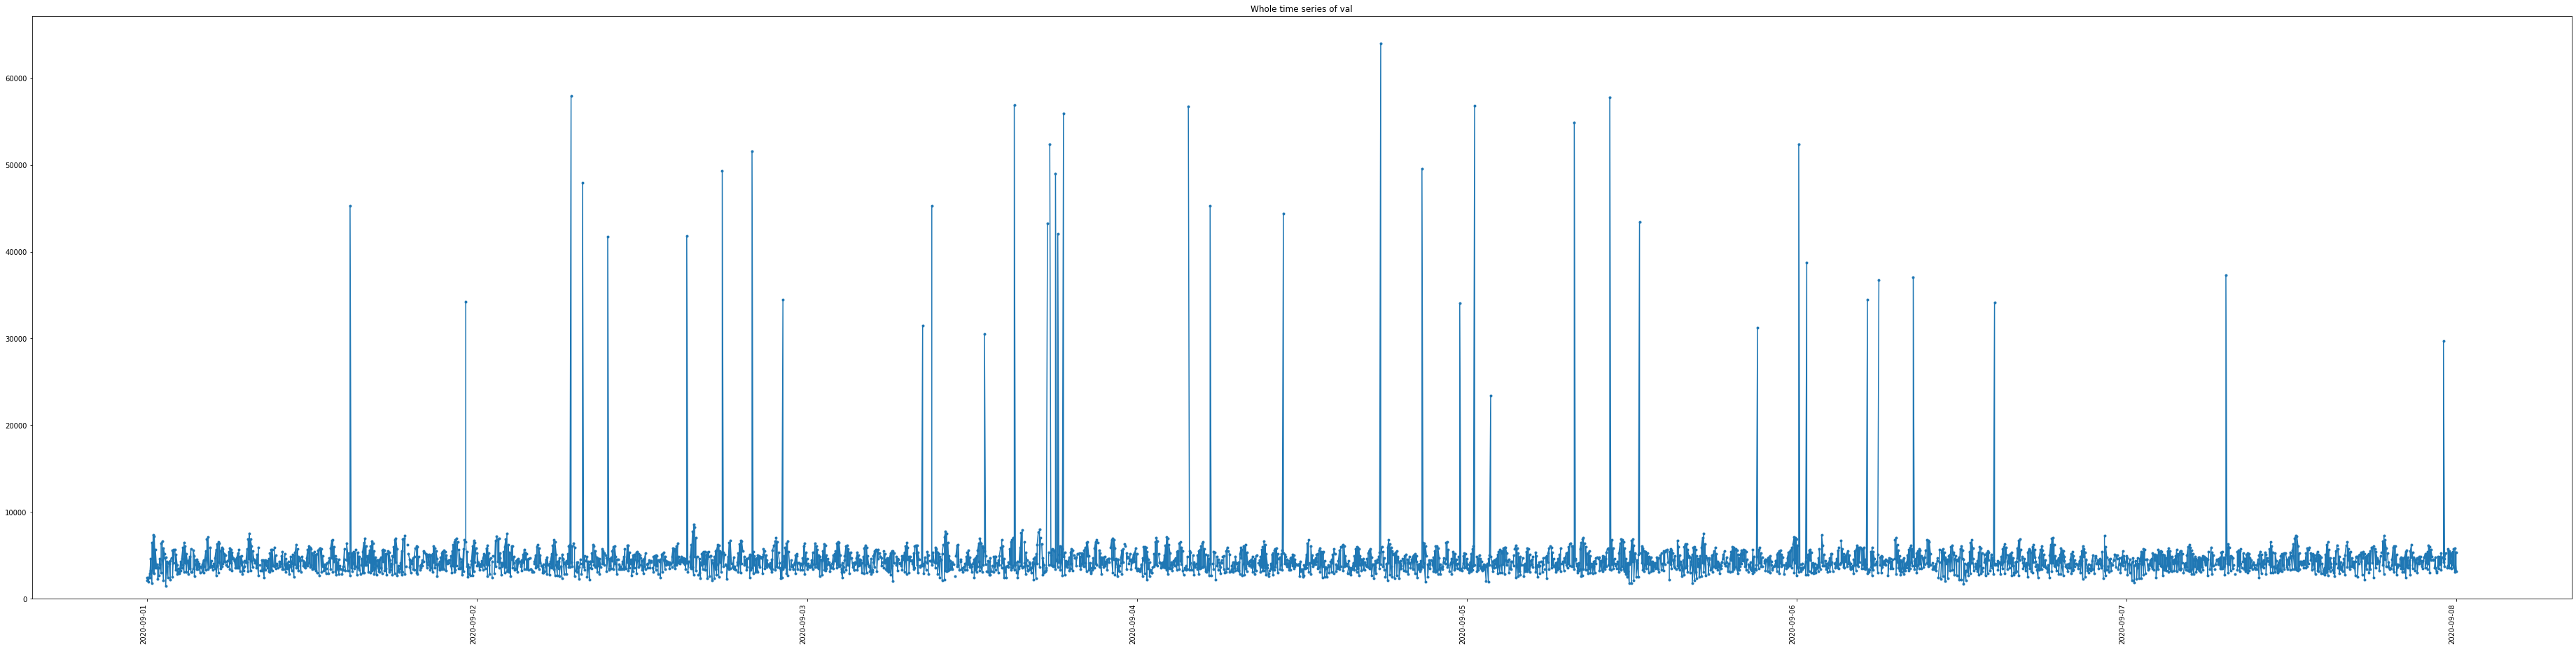

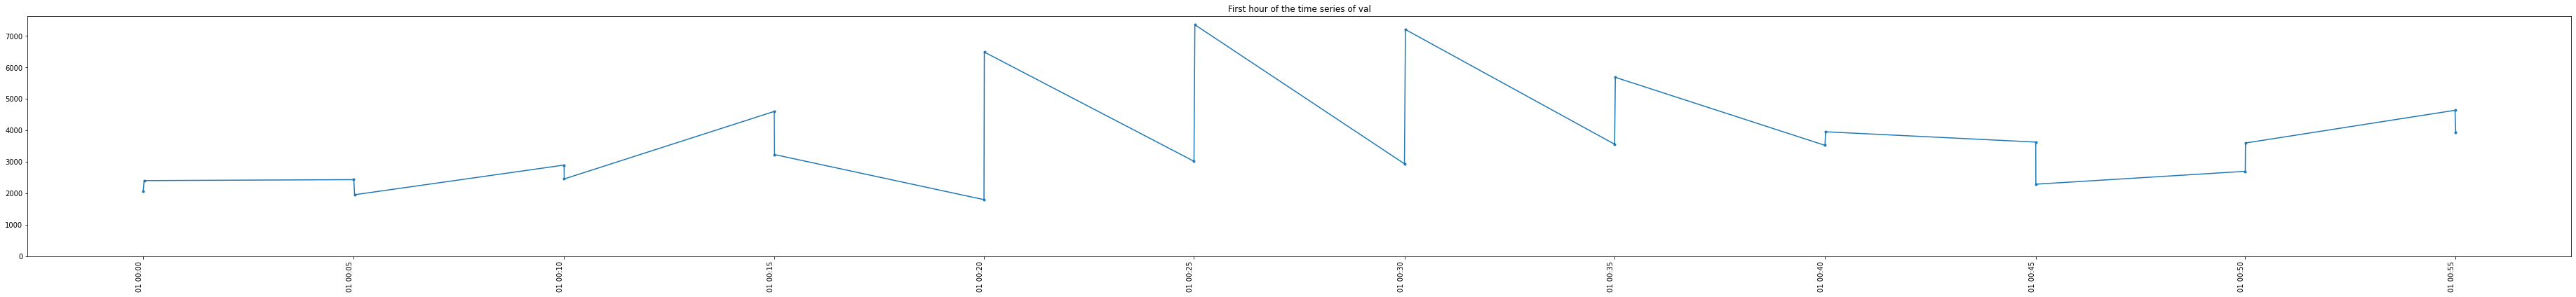

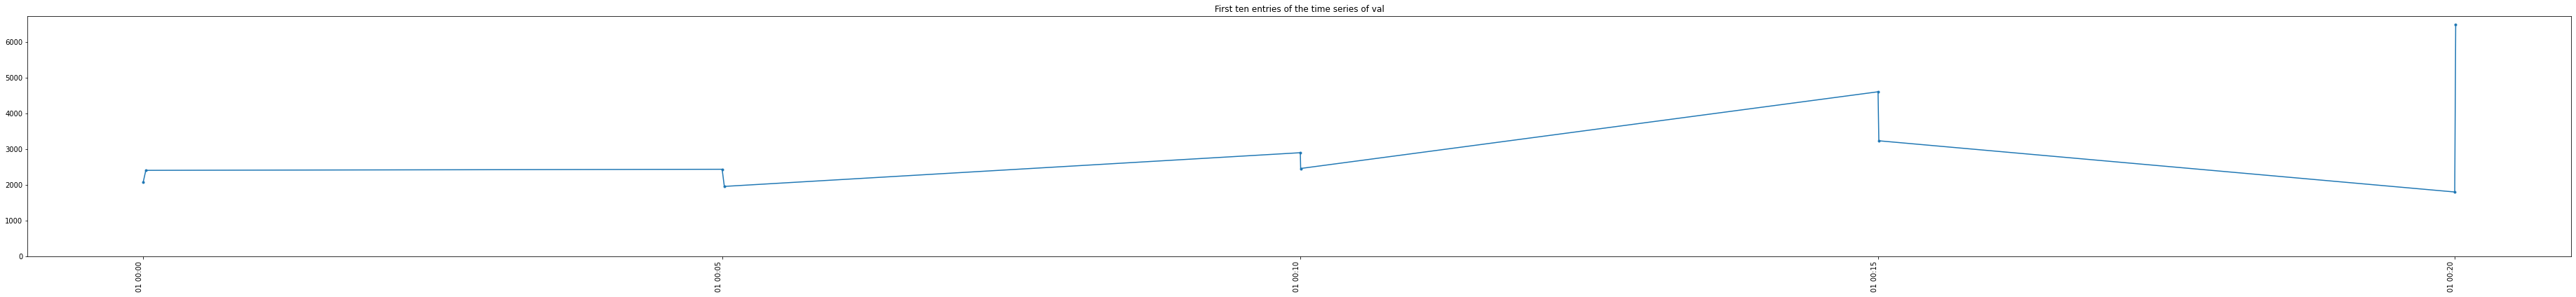

In [3]:
# A(iii)

import matplotlib.dates as mdates
import matplotlib.pyplot as plt


def inspection_plot(series: pd.Series) -> None:
    # plot of the whole time series of val 
    first_plot_series = series.copy()
    first_plot_series.plot.line(figsize=(65, 17), marker=".")
    first_plot_date_format = mdates.DateFormatter("%Y-%m-%d") # defining the date format for the x-axis, daily frequency
    plt.gca().xaxis.set_major_formatter(first_plot_date_format)
    plt.ylim(bottom=0) # setting the y-axis to start from 0
    plt.xticks(rotation=90)
    plt.title("Whole time series of val")
    plt.show()

    # plot of the first hour of the time series of val
    # here I am accepting the first hour = the smallest timestamp + 1 hour without any roundings
    # if the first hour means from xx:00 to xx:59 minutes then the filter should be:
    # second_plot_series.index < raw_data.index.round(freq="H").min() + pd.DateOffset(hours=1)
    second_plot_series = series.copy()
    second_plot_series = second_plot_series[
        second_plot_series.index < second_plot_series.index.min() + pd.DateOffset(hours=1)
    ]
    second_plot_series.plot.line(figsize=(65, 7), marker=".")
    second_plot_date_format = mdates.DateFormatter("%d %H:%M") # defining the date format for the x-axis
    plt.gca().xaxis.set_major_formatter(second_plot_date_format)
    plt.ylim(bottom=0)
    plt.xticks(
        [x for x in second_plot_series.reset_index()["index"].values[::2]], rotation=90
    ) # displaying every 2nd timestamp index because the data from the two sources arrives almost at the same time 
    plt.title("First hour of the time series of val")
    plt.show()

    # plot of the first ten entried of the time series of val
    third_plot_series = series.copy()
    third_plot_series = third_plot_series[:10] # raw_data is sorted so it's ok to just select the first 10 rows
    third_plot_series.plot.line(figsize=(65, 7), marker=".")
    third_plot_date_format = mdates.DateFormatter("%d %H:%M")
    plt.gca().xaxis.set_major_formatter(third_plot_date_format)
    plt.ylim(bottom=0)
    plt.xticks(
        [x for x in third_plot_series.reset_index()["index"].values[::2]], rotation=90
    )
    plt.title("First ten entries of the time series of val")
    plt.show()


inspection_plot(series=raw_data["val"])

## B

In [4]:
# B(i)

import numpy as np

# calculating the lower and upper quartiles, corresponding to the 25th and 75th empirical percentiles
lq = np.nanquantile(raw_data['val'], 0.25)
uq = np.nanquantile(raw_data['val'], 0.75)
# calculating the interquartile range
iqr = uq - lq

In [5]:
# B(ii)

# creating a new boolean column in raw_data labeling wheter the value in "val" is an outlier or not
raw_data["is_outlier"] = np.where(
    (raw_data["val"] < lq - 1.5 * iqr) | (raw_data["val"] > uq + 1.5 * iqr), True, False
)
# creating pd.Series
raw_outlier_index = raw_data["is_outlier"]
raw_outlier_index

2020-09-01 00:00:00.135012414    False
2020-09-01 00:00:01.491934077    False
2020-09-01 00:05:00.733157824    False
2020-09-01 00:05:01.871980801    False
2020-09-01 00:10:00.937959087    False
                                 ...  
2020-09-07 23:50:01.858081713    False
2020-09-07 23:55:00.290465808    False
2020-09-07 23:55:01.695819795    False
2020-09-08 00:00:00.061642127    False
2020-09-08 00:00:00.533911733    False
Name: is_outlier, Length: 4034, dtype: bool

In [6]:
# B(iii)

# summing the values in raw_outlier_index, true/false are treated as 1/0
print(f'There are {raw_outlier_index.sum()} outliers in raw_data')

There are 56 outliers in raw_data


In [7]:
# B(iv)

no_outlier_data = raw_data.copy()
# filtering the rows by the rule is_outlier = True and if true replacing the "val" value with np.NaN
no_outlier_data.loc[raw_outlier_index == True, 'val'] = np.NaN
no_outlier_data

,val,source,is_outlier
2020-09-01 00:00:00.135012414,2070.000000,Wakanda,False
2020-09-01 00:00:01.491934077,2400.000000,Buranda,False
2020-09-01 00:05:00.733157824,2430.000000,Buranda,False
2020-09-01 00:05:01.871980801,1950.000000,Wakanda,False
2020-09-01 00:10:00.937959087,2893.641781,Buranda,False
...,...,...,...
2020-09-07 23:50:01.858081713,3661.113942,Buranda,False
2020-09-07 23:55:00.290465808,3053.716051,Buranda,False
2020-09-07 23:55:01.695819795,5795.568576,Wakanda,False
2020-09-08 00:00:00.061642127,3157.172016,Buranda,False


In [8]:
# B(v)

cleaned_data = no_outlier_data.dropna() # dropping all nan values
cleaned_data

,val,source,is_outlier
2020-09-01 00:00:00.135012414,2070.000000,Wakanda,False
2020-09-01 00:00:01.491934077,2400.000000,Buranda,False
2020-09-01 00:05:00.733157824,2430.000000,Buranda,False
2020-09-01 00:05:01.871980801,1950.000000,Wakanda,False
2020-09-01 00:10:00.937959087,2893.641781,Buranda,False
...,...,...,...
2020-09-07 23:50:01.858081713,3661.113942,Buranda,False
2020-09-07 23:55:00.290465808,3053.716051,Buranda,False
2020-09-07 23:55:01.695819795,5795.568576,Wakanda,False
2020-09-08 00:00:00.061642127,3157.172016,Buranda,False


## C

In [9]:
# C(i) 

def reindex_data(df: pd.DataFrame) -> pd.DataFrame:
    """A function for reindexing a dataframe's DateTimeIndex.

    * rounding the current indices to 5 minute frequency because on 
    every 5 minutes, for the respective index, there is data arriving from two
    sources with slight delay, and small difference between the sources

    * after rounding with frequency 5 minutes, each index has two identical timestamps 
    so we drop the duplicates by keeping the first duplicate (the data is sorted and 
    the record arrived first is wanted)

    * creating new_indices for the dataframe with 5 minute frequency 

    * applying reindex() with the new indices and backfilling when there is missing data
    """
    reindexed_data = df.copy()
    reindexed_data.index = reindexed_data.index.round(freq="5T")
    reindexed_data = reindexed_data[~reindexed_data.index.duplicated(keep='first')]

    new_indices = pd.date_range(
        start=min(reindexed_data.index), 
        end=max(reindexed_data.index), 
        freq="5T"
    )
    reindexed_data = reindexed_data.reindex(new_indices, method='backfill')
    
    return reindexed_data

reindexed_data = reindex_data(df=cleaned_data)
reindexed_data

,val,source,is_outlier
2020-09-01 00:00:00,2070.000000,Wakanda,False
2020-09-01 00:05:00,2430.000000,Buranda,False
2020-09-01 00:10:00,2893.641781,Buranda,False
2020-09-01 00:15:00,4599.562373,Wakanda,False
2020-09-01 00:20:00,1793.946032,Buranda,False
...,...,...,...
2020-09-07 23:40:00,3500.644591,Buranda,False
2020-09-07 23:45:00,5432.015717,Wakanda,False
2020-09-07 23:50:00,5756.125171,Wakanda,False
2020-09-07 23:55:00,3053.716051,Buranda,False


In [10]:
# C(ii)

def ar_prediction(df: pd.DataFrame, coeff_1: float, coeff_2: float, coeff_3: float) -> pd.DataFrame:
    """A function for calculating an AR prediction followin the format:
    coeff_1 + coeff_2 * y_{t-1} + coeff_3 * y_{t-2}
    """
    preidction_df = df.copy()
    preidction_df["shift_1"] = preidction_df["val"].shift(periods=1) # column corresponding to y_{t-1}
    preidction_df["shift_2"] = preidction_df["val"].shift(periods=2) # column corresponding to y_{t-2}
    preidction_df["prediction"] = coeff_1 + coeff_2 * preidction_df["shift_1"] + coeff_3 * preidction_df["shift_2"] # doing the prediction
    # setting the first two entries of the prediction column to be equal to the real observed values
    preidction_df["prediction"][:2] = preidction_df["val"][:2] 

    return preidction_df

reindexed_data = ar_prediction(df=reindexed_data, coeff_1=3426, coeff_2=0.115, coeff_3=0.079)
reindexed_data

<ipython-input-10-904f68934e46>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preidction_df["prediction"][:2] = preidction_df["val"][:2]


,val,source,is_outlier,shift_1,shift_2,prediction
2020-09-01 00:00:00,2070.000000,Wakanda,False,NaN,NaN,2070.000000
2020-09-01 00:05:00,2430.000000,Buranda,False,2070.000000,NaN,2430.000000
2020-09-01 00:10:00,2893.641781,Buranda,False,2430.000000,2070.000000,3868.980000
2020-09-01 00:15:00,4599.562373,Wakanda,False,2893.641781,2430.000000,3950.738805
2020-09-01 00:20:00,1793.946032,Buranda,False,4599.562373,2893.641781,4183.547374
...,...,...,...,...,...,...
2020-09-07 23:40:00,3500.644591,Buranda,False,4110.057885,3517.370361,4176.528915
2020-09-07 23:45:00,5432.015717,Wakanda,False,3500.644591,4110.057885,4153.268701
2020-09-07 23:50:00,5756.125171,Wakanda,False,5432.015717,3500.644591,4327.232730
2020-09-07 23:55:00,3053.716051,Buranda,False,5756.125171,5432.015717,4517.083636


## D

In [11]:
# D(i)

# creating dataframes with data only from wakanda or buranda 
cleaned_data_wakanda = cleaned_data[cleaned_data['source'] == 'Wakanda']
cleaned_data_buranda = cleaned_data[cleaned_data['source'] == 'Buranda']
cleaned_data_buranda

,val,source,is_outlier
2020-09-01 00:00:01.491934077,2400.000000,Buranda,False
2020-09-01 00:05:00.733157824,2430.000000,Buranda,False
2020-09-01 00:10:00.937959087,2893.641781,Buranda,False
2020-09-01 00:15:01.330237820,3227.409397,Buranda,False
2020-09-01 00:20:00.352663696,1793.946032,Buranda,False
...,...,...,...
2020-09-07 23:40:00.202291086,3500.644591,Buranda,False
2020-09-07 23:45:01.404531612,3895.817717,Buranda,False
2020-09-07 23:50:01.858081713,3661.113942,Buranda,False
2020-09-07 23:55:00.290465808,3053.716051,Buranda,False


In [12]:
# D(ii)

# reindexing the dataframes with the previously defined function reindex_data()
reindexed_wakanda = reindex_data(df=cleaned_data_wakanda)
reindexed_buranda = reindex_data(df=cleaned_data_buranda)

In [13]:
# D(iii)

# making an AR prediction for wakanda and buranda with the previously defined function ar_prediction()
reindexed_wakanda = ar_prediction(df=reindexed_wakanda, coeff_1=1981, coeff_2=1.217, coeff_3=-0.615)
reindexed_buranda = ar_prediction(df=reindexed_buranda, coeff_1=2542, coeff_2=-0.146, coeff_3=0.433)

<ipython-input-10-904f68934e46>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preidction_df["prediction"][:2] = preidction_df["val"][:2]


## E

In [14]:
# E(i)

# saving the dataframes as csv files
reindexed_data[['val', 'prediction']].to_csv('naive_model.csv')
reindexed_wakanda[['val', 'prediction']].to_csv('wakanda_model.csv')
reindexed_buranda[['val', 'prediction']].to_csv('buranda_model.csv')

In [15]:
# E(ii)

import json


def calculate_rmse(df: pd.DataFrame) -> float:
    """A function for calculating the RMSE of the dataframe columns 
    "prediction" and "val".
    """
    return np.sqrt(np.mean((df["prediction"] - df["val"]) ** 2))

naive_model_rmse = calculate_rmse(df=reindexed_data)
wakanda_model_rmse = calculate_rmse(df=reindexed_wakanda)
buranda_model_rmse = calculate_rmse(df=reindexed_buranda)

# dictionary containing the RMSE values for each model
rmse_values = {
    "naive": naive_model_rmse,
    "wakanda": wakanda_model_rmse,
    "buranda": buranda_model_rmse,
}

# saving the dictionary as a .json file
with open("mse.json", "w") as f:
    json.dump(rmse_values, f)

In [16]:
# E(iii)
# (Enter answer in commented block, or change cell type to Markdown)
#
# Based on the RMSE results, showing RMSE of the naive model = 1017.1907398228727, the wakanda model = 479.62904832993, 
# and the buranda model = 514.3928561682299, we can conclude that two separate models should be used. The naive RMSE is around twice
# as much as the buranda and wakanda models' RMSEs. RMSE measures the prediction error and the aim is to be as small as possible, 
# or simply said the less the RMSE the better.
#
#